<a href="https://colab.research.google.com/github/DanielSerna09/Proyecto-01/blob/master/Copia_de_amazon_cells_labelled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jdvelasq/datalabs/blob/master/notebooks/amazon_cells_labelled.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de sentimientos de ventas en Amazon
===

* *60 min* | Última modificación: Junio 22, 2019


EL siguiente archivo contiene las revisiones de productos vendidos en amazon.com. Estas están calificadas como positvas y negativas. Construya un sistema de análisis de sentimientos para determinar si la experiencia del usuario fue positiva o negativa.

In [0]:
##
## Preparacion
##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/amazon_cells_labelled.tsv",
    sep = '\t',           
    thousands = None,    
    decimal = '.',   
    header = None,
    names=['text','type'],
    encoding='latin-1')  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609 entries, 0 to 14608
Data columns (total 2 columns):
text    14609 non-null object
type    1000 non-null float64
dtypes: float64(1), object(1)
memory usage: 228.3+ KB


In [0]:
df.columns

Index(['text', 'type'], dtype='object')

In [0]:
df

,text,type
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN
5,Great for the jawbone.,1.0
6,When I got this item it was larger than I thou...,NaN
7,(I looked for one that specifically said DCU-6...,NaN
8,The first time it was turned on the screen dis...,NaN
9,In some programs clicking it is the same as hi...,NaN


In [0]:
df.head

<bound method NDFrame.head of                                                     text  type
0      I try not to adjust the volume setting to avoi...   NaN
1      So there is no way for me to plug it in here i...   0.0
2                            Good case, Excellent value.   1.0
3            I thought Motorola made reliable products!.   NaN
4                             Battery for Motorola Razr.   NaN
5                                 Great for the jawbone.   1.0
6      When I got this item it was larger than I thou...   NaN
7      (I looked for one that specifically said DCU-6...   NaN
8      The first time it was turned on the screen dis...   NaN
9      In some programs clicking it is the same as hi...   NaN
10     Tied to charger for conversations lasting more...   0.0
11                                     The mic is great.   1.0
12     What happened was that I only had like 70 cont...   NaN
13     I have to jiggle the plug to get it to line up...   0.0
14     I bought five of t

In [0]:
df.type.value_counts()

1.0    500
0.0    500
Name: type, dtype: int64

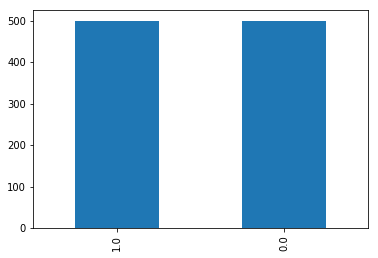

In [0]:
df.type.value_counts().plot.bar()

In [0]:
round(100 * df.type.value_counts() / sum(df.type.value_counts()), 1)

1.0    50.0
0.0    50.0
Name: type, dtype: float64

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count_vect = CountVectorizer(
    analyzer='word',        # a nivel de palabra
    lowercase=True,         # convierte a minúsculas
    stop_words='english',   # stop_words en inglés
    min_df=2)               # ignora palabras con baja freq

In [0]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
dtm=count_vect.fit_transform(df.text)

In [0]:
rows,col=dtm.nonzero()
for row,col in zip(rows,col):
  dtm[row,col]=5;

In [0]:
dtm.shape

(1000, 611)

In [0]:
vocabulary = count_vect.get_feature_names()
len (vocabulary)

4345

In [0]:
df[df.type.notna()]

,text,type
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0
13,I have to jiggle the plug to get it to line up...,0.0
15,If you have several dozen or several hundred c...,0.0
17,If you are Razr owner...you must have this!,1.0
18,"Needless to say, I wasted my money.",0.0
21,What a waste of money and time!.,0.0


In [0]:
vocabulary = count_vect.get_feature_names()
len(vocabulary)

vocabulary[0:5]

df_cmp = df[df.type.notna()]
df_cmp

,text,type
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0
13,I have to jiggle the plug to get it to line up...,0.0
15,If you have several dozen or several hundred c...,0.0
17,If you are Razr owner...you must have this!,1.0
18,"Needless to say, I wasted my money.",0.0
21,What a waste of money and time!.,0.0


In [0]:
dtm = count_vect.fit_transform(df_cmp.text)
count_vect.get_feature_names()

X_train      = dtm[0:500,]
X_test       = dtm[500:,]
y_train_true = df_cmp.type[0:500]
y_test_true  = df_cmp.type[500:]

df_cmp.type[500:].value_counts()

df_cmp.type[0:500].value_counts()

1.0    261
0.0    239
Name: type, dtype: int64

In [0]:
dtm = count_vect.fit_transform(df_cmp.text)
count_vect.get_feature_names()

X_train      = dtm[0:500,]
X_test       = dtm[500:,]
y_train_true = df_cmp.type[0:500]
y_test_true  = df_cmp.type[500:]

df_cmp.type[500:].value_counts()

df_cmp.type[0:500].value_counts()

from sklearn.naive_bayes import BernoulliNB

clf =BernoulliNB()
clf.fit(X_train.toarray(), y_train_true)
clf

y_test_pred = clf.predict(X_test.toarray())
y_test_pred

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test_true,
                y_pred = y_test_pred)

array([[186,  75],
       [ 51, 188]])

In [0]:
#Reconstruyo toda la muetra
dtm_total = count_vect.transform(df.text)
dtm_total.shape

clf.predict(dtm_total.toarray()).shape

pronostico = clf.predict(dtm_total.toarray())
pronostico

array([0., 0., 1., ..., 1., 1., 0.])

In [0]:

prec_train = []
prec_test = []

for k in range(1, 28):
  
  count_vect = CountVectorizer(
      analyzer='word',      
      lowercase=True,       
      stop_words='english', 
      min_df=k)  


  df_cmp = df[df.type.notna()]

  #
  # set de entrenamiento
  #
  df_train = df_cmp.loc[0:500,]
  dtm_train = count_vect.fit_transform(df_train.text)
  X_train = dtm_train
  y_train_true = df_train.type

  #
  # set de prueba
  #
  df_test = df_cmp.loc[500:,]
  dtm_test = count_vect.transform(df_test.text)
  X_test = dtm_test
  y_test_true = df_test.type

  #
  # entrenamiento y pronostico

  clf = BernoulliNB()
  clf.fit(
      X_train.toarray(), 
      y_train_true)

  y_train_pred = clf.predict(
      X_train.toarray())

  y_test_pred = clf.predict(
      X_test.toarray())

  C_train = confusion_matrix(
      y_train_true,
      y_train_pred)

  C_test = confusion_matrix(
      y_test_true,
      y_test_pred)

  precision_train = (C_train[0][0] + C_train[1][1]) / sum(sum(C_train))
  prec_train.append(precision_train)


  precision_test = (C_test[0][0] + C_test[1][1]) / sum(sum(C_test))
  prec_test.append(precision_test)


print(prec_train)
print(prec_test)


[0.9636363636363636, 0.8848484848484849, 0.8121212121212121, 0.7515151515151515, 0.7393939393939394, 0.7151515151515152, 0.7151515151515152, 0.6787878787878788, 0.6848484848484848, 0.6424242424242425, 0.6424242424242425, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.6181818181818182, 0.5272727272727272, 0.5272727272727272, 0.5272727272727272, 0.5272727272727272]
[0.6706586826347305, 0.7137724550898203, 0.704191616766467, 0.7089820359281437, 0.6766467065868264, 0.6622754491017964, 0.6610778443113773, 0.6562874251497006, 0.6538922155688622, 0.5940119760479042, 0.5940119760479042, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209, 0.5700598802395209,

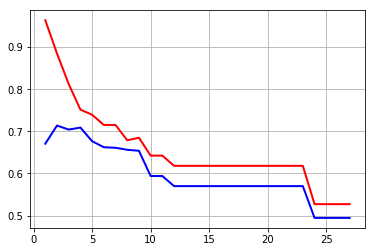

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,28), prec_train, color ='red', linewidth = 2)
plt.plot(range(1,28), prec_test, color ='blue', linewidth = 2);
plt.grid()

---

In [0]:
import altair as alt

w = pd.DataFrame({
    'words': words,
    'freq': freq.toarray()[0] })

alt.Chart(w).mark_bar().encode(
    x = 'freq:Q',
    y = alt.Y('words:N', sort=alt.EncodingSortField(field='freq:Q')),
    color = 'freq:Q'
)

NameError: ignored